<blockquote>
    <h1>Exercise 7.9</h1>
    <p>This question uses the variables $\mathrm{dis}$ (the weighted mean of distances to five Boston employment centers) and $\mathrm{nox}$ (nitrogen oxides concentration in parts per 10 million) from the <code>Boston</code> data. We will treat $\mathrm{dis}$ as the predictor and $\mathrm{nox}$ as the response.</p>
    <ol>
        <li>Use the <code>poly()</code> function to fit a cubic polynomial regression to predict $\mathrm{nox}$ using $\mathrm{dis}$. Report the regression output, and plot the resulting data and polynomial fits.</li>
        <li>Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.</li>
        <li>Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.</li>
        <li>Use the <code>bs()</code> function to fit a regression spline to predict $\mathrm{nox}$ using $\mathrm{dis}$. Report the output for the fit using four degrees of freedom. How did you choose the knots? Plot the resulting fit.</li>
        <li>Now fit a regression spline for a range of degrees of freedom, and plot the resulting fits and report the resulting RSS. Describe the results obtained.</li>
        <li>Perform cross-validation or another approach in order to select the best degrees of freedom for a regression spline on this data. Describe your results.</li>
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/usefulFunctions.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut
from patsy import dmatrix

In [2]:
df = pd.read_csv("../../DataSets/Boston/Boston.csv")
df = df[['dis', 'nox']]
df.head()

df_x = df[['dis']]
df_y = df[['nox']]

,dis,nox
0,4.0900,0.538
1,4.9671,0.469
2,4.9671,0.469
3,6.0622,0.458
4,6.0622,0.458


<h3>Exercise 7.9.1</h3>
<blockquote>
    <i>Use the <code>poly()</code> function to fit a cubic polynomial regression to predict $\mathrm{nox}$ using $\mathrm{dis}$. Report the regression output, and plot the resulting data and polynomial fits.</i>
</blockquote>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    nox   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     419.3
Date:                Sat, 15 Feb 2020   Prob (F-statistic):          2.71e-136
Time:                        11:56:33   Log-Likelihood:                 690.44
No. Observations:                 506   AIC:                            -1373.
Df Residuals:                     502   BIC:                            -1356.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9341      0.021     45.110      0.000       0.893       0.975
dis           -0.1821      0.015    -12.389      0.000      -0.211      -0.153
dis^2          0.0219      0.003      7.476      0.000       0.016       0.028
dis^3         -0.0009      0.000     -5.124      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       64.176   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.386
Skew:                           0.917   Prob(JB):                     1.06e-19
Kurtosis:                       3.886   Cond. No.                     2.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

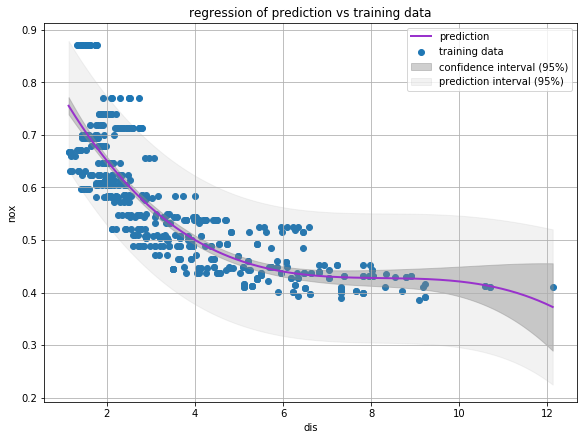

In [3]:
total_degrees = 3
independent = df_x.columns[0]
polynomialMap = {independent: 1}
for i in range(2, total_degrees + 1):
    variable_name = independent + '^' + str(i)
    df_x[variable_name] = df_x[independent]**i
    polynomialMap[variable_name] = i

df_x.insert(0, 'Intercept', 1)

model = sm.OLS(df_y, df_x)
fitted = model.fit()
fitted.summary()

createPolynomialLinearRegressionPlot(df_x, df_y, fitted_model=fitted, height=6, width=8, polynomialMap=polynomialMap)

<h3>Exercise 7.9.2</h3>
<blockquote>
    <i>Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.</i>
</blockquote>

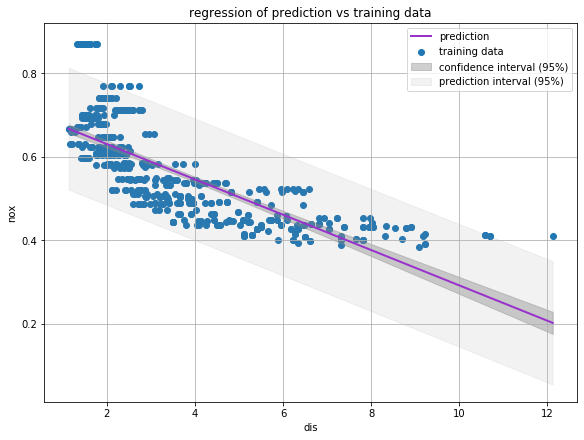

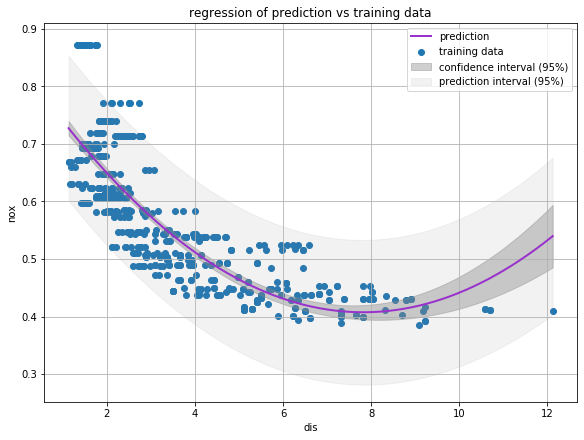

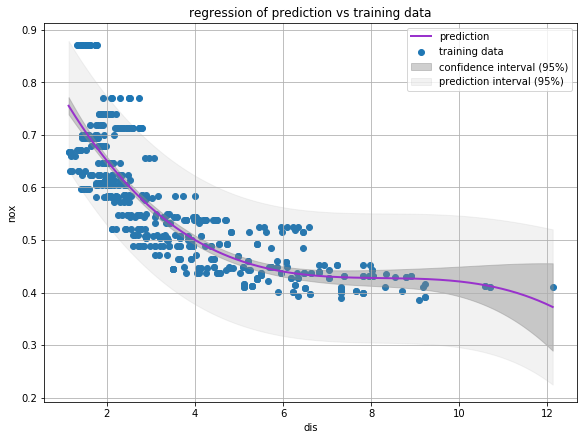

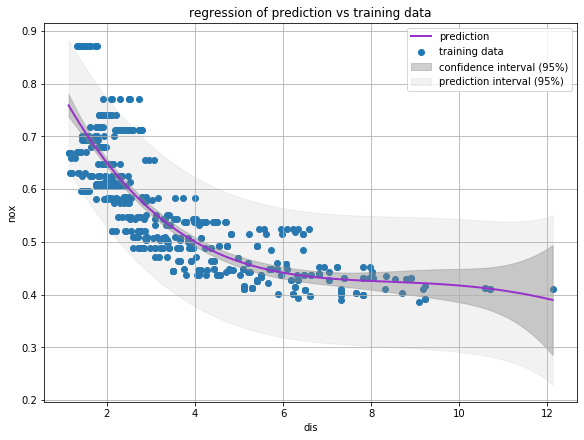

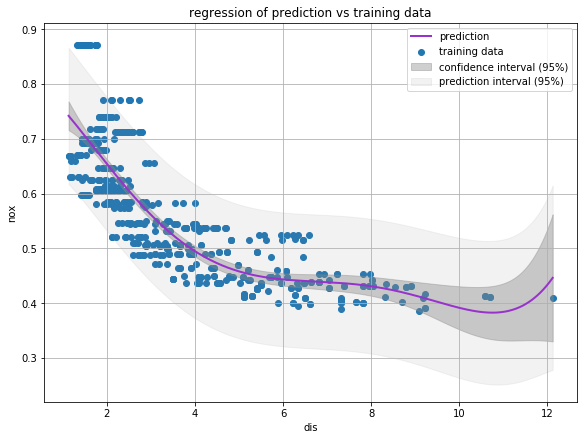

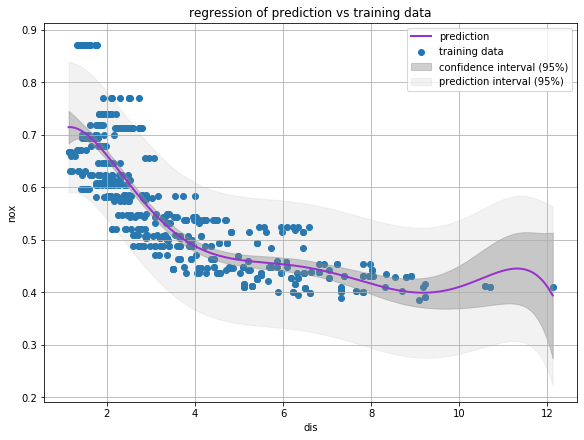

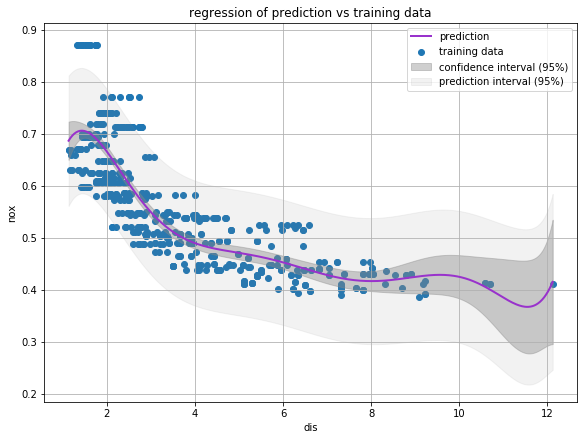

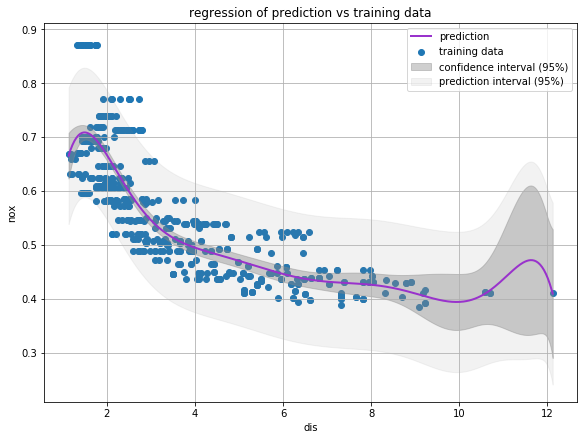

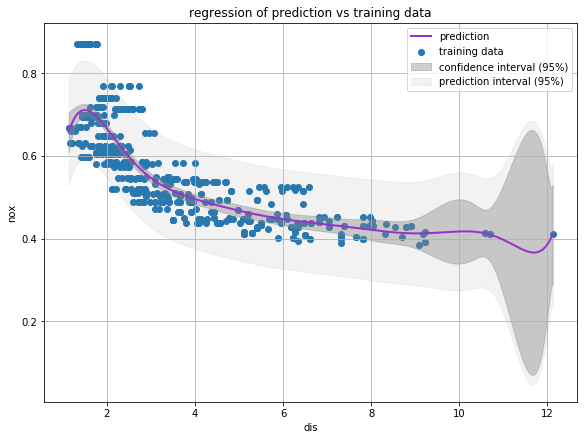

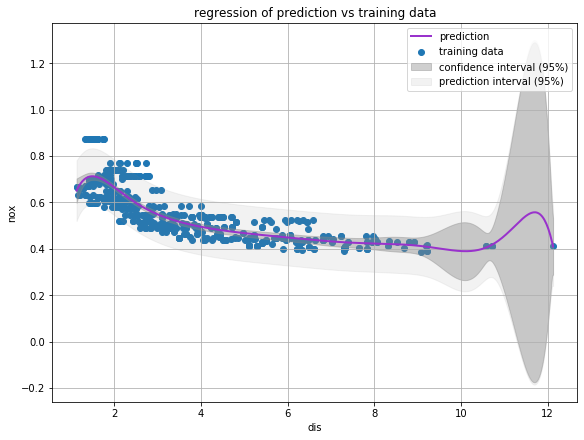

In [4]:
df_x = df_x[['Intercept', 'dis']].copy()
total_degrees = 10
rss_train_arr = np.zeros((total_degrees, ))
independent = 'dis'
polynomialMap = {independent: 1}
for i in range(1, total_degrees + 1):
    if i >= 2:
        variable_name = independent + '^' + str(i)
        df_x[variable_name] = df_x[independent]**i
        polynomialMap[variable_name] = i


    fitted = sm.OLS(df_y, df_x).fit()
    rss_train_arr[i-1] = fitted.ssr

    createPolynomialLinearRegressionPlot(df_x, df_y, fitted_model=fitted, height=6, width=8, polynomialMap=polynomialMap)

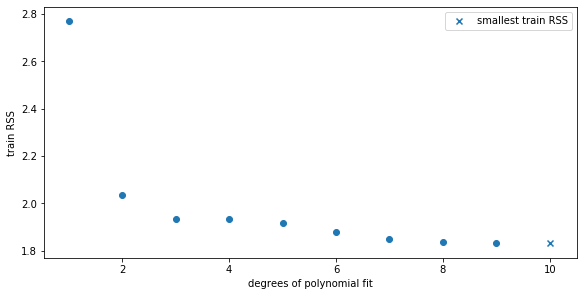

In [5]:
min_rss = np.amin(rss_train_arr)
min_idx = np.where(rss_train_arr == min_rss)[0][0]
rss_train_arr = np.delete(rss_train_arr, min_idx)

degrees_arr = np.arange(1, total_degrees + 1)
degrees_arr = np.delete(degrees_arr, min_idx)

fig, ax = plt_func.subplots(1, 1, constrained_layout=True, figsize=(8, 4))
_ = ax.scatter(
    degrees_arr, rss_train_arr
)
_ = ax.scatter(min_idx + 1, min_rss, marker='x', label='smallest train RSS',
               c=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
_ = ax.set_xlabel('degrees of polynomial fit')
_ = ax.set_ylabel('train RSS')
_ = ax.legend()

<h3>Exercise 7.9.3</h3>
<blockquote>
    <i>Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.</i>
</blockquote>

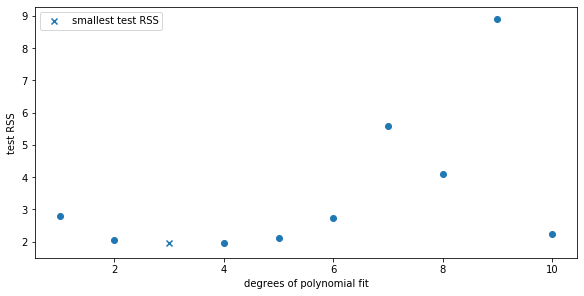

In [6]:
descriptiveColumns = ['Intercept', 'dis']
total_degrees = 10
rss_test_arr = np.zeros((total_degrees, ))
independent = 'dis'
loocv = LeaveOneOut() # leave-one-out cross-validation
for i in range(1, total_degrees + 1):
    if i >= 2:
        variable_name = independent + '^' + str(i)
        descriptiveColumns.append(variable_name)
    
    RSS = 0
    for train_index, test_index in loocv.split(df_x):
        df_x_train, df_x_test = df_x[descriptiveColumns].iloc[train_index], df_x[descriptiveColumns].iloc[test_index]
        df_y_train, df_y_test = df_y.iloc[train_index], df_y.iloc[test_index]

        fitted = sm.OLS(df_y_train, df_x_train).fit()
        Y_pred = fitted.predict(df_x_test.to_numpy())
        RSS += (df_y_test.iloc[0, 0] - Y_pred[0])**2
    
    rss_test_arr[i-1] = RSS
        
min_rss = np.amin(rss_test_arr)
min_idx = np.where(rss_test_arr == min_rss)[0][0]
rss_test_arr = np.delete(rss_test_arr, min_idx)

degrees_arr = np.arange(1, total_degrees + 1)
degrees_arr = np.delete(degrees_arr, min_idx)

fig, ax = plt_func.subplots(1, 1, constrained_layout=True, figsize=(8, 4))
_ = ax.scatter(
    degrees_arr, rss_test_arr
)
_ = ax.scatter(min_idx + 1, min_rss, marker='x', label='smallest test RSS',
               c=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
_ = ax.set_xlabel('degrees of polynomial fit')
_ = ax.set_ylabel('test RSS')
_ = ax.legend()

<h3>Exercise 7.9.4</h3>
<blockquote>
    <i>Use the <code>bs()</code> function to fit a regression spline to predict $\mathrm{nox}$ using $\mathrm{dis}$. Report the output for the fit using four degrees of freedom. How did you choose the knots? Plot the resulting fit.</i>
</blockquote>

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    nox   No. Observations:                  506
Model:                            GLM   Df Residuals:                      502
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                       0.0038528
Method:                          IRLS   Log-Likelihood:                 690.44
Date:                Sat, 15 Feb 2020   Deviance:                       1.9341
Time:                        11:56:50   Pearson chi2:                     1.93
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            0.3812      0.005     72.236      0.000       0.371       0.392
bs(df_x["dis"], df=4, include_intercept=True)[0]     0.3739      0.010     37.409      0.000       0.354       0.394
bs(df_x["dis"], df=4, include_intercept=True)[1]    -0.1243      0.025     -4.954      0.000      -0.174      -0.075
bs(df_x["dis"], df=4, include_intercept=True)[2]     0.1404      0.043      3.262      0.001       0.056       0.225
bs(df_x["dis"], df=4, include_intercept=True)[3]    -0.0088      0.038     -0.230      0.818      -0.083       0.066
====================================================================================================================
"""

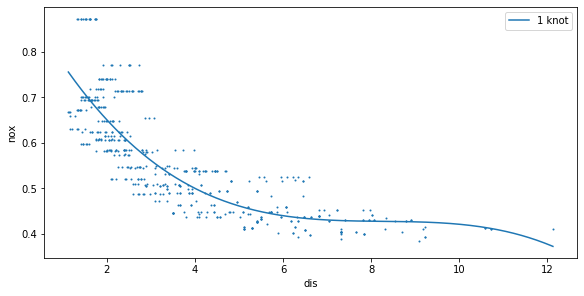

In [7]:
df = 4
df_X_transformed = dmatrix(f'bs(df_x["dis"], df={df}, include_intercept=True)',
                                     {'df_x["dis"]': df_x["dis"]}, return_type='dataframe')

assert df_X_transformed.shape[1] == df + 1
fitted = sm.GLM(df_y, df_X_transformed).fit()
fitted.summary()

knots = df - 3
plotCubicSpines(df_x[['dis']], df_y, {knots: fitted})

<h3>Exercise 7.9.5</h3>
<blockquote>
    <i>Now fit a regression spline for a range of degrees of freedom, and plot the resulting fits and report the resulting RSS. Describe the results obtained.</i>
</blockquote>

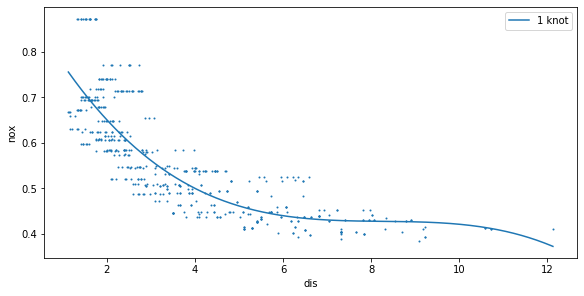

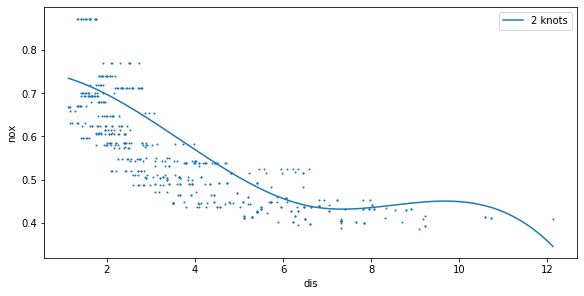

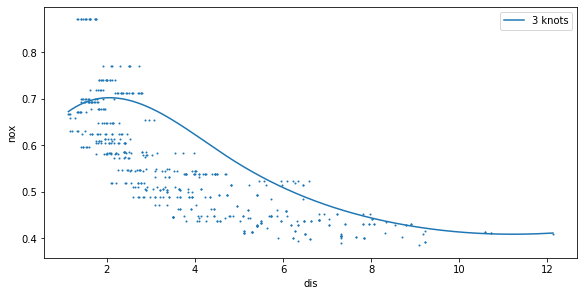

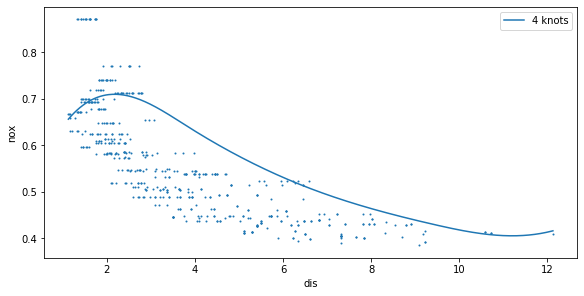

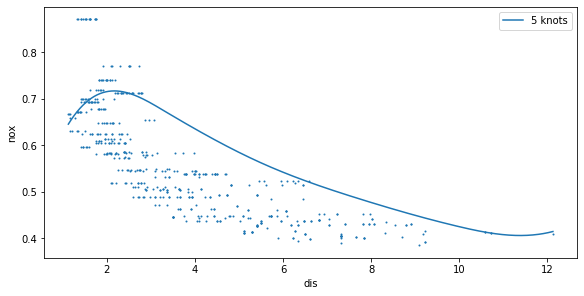

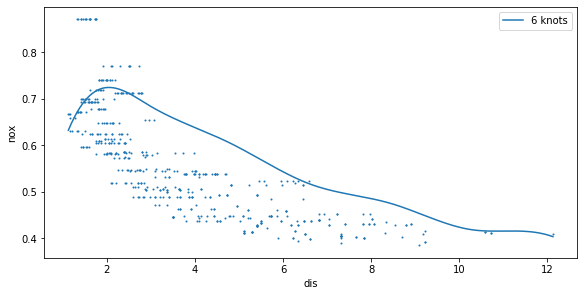

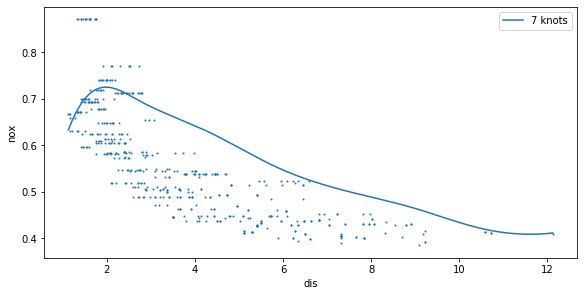

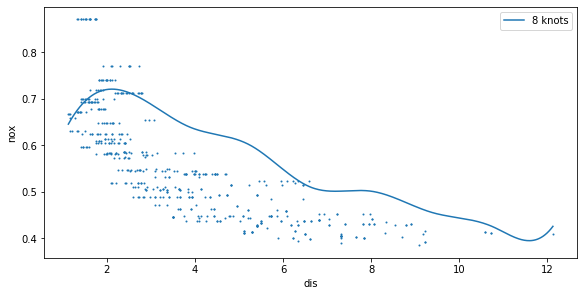

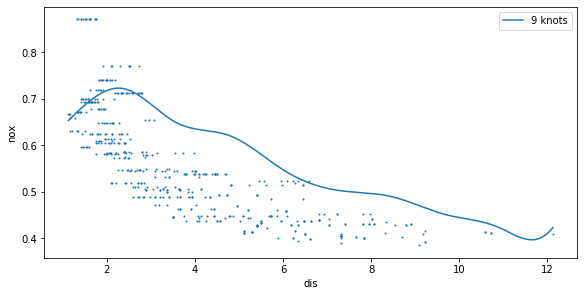

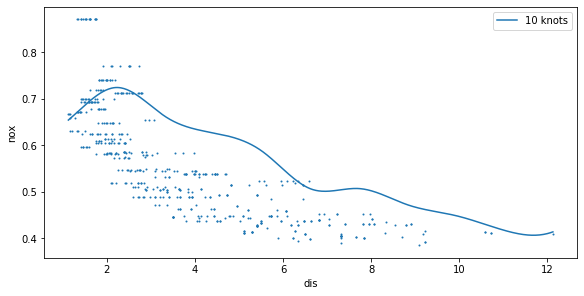

In [8]:
total_knots = 10
rss_train_arr = np.zeros((total_knots, ))
for knots in range(1, total_knots + 1):
    df = knots + 3    
    df_X_transformed = dmatrix(f'bs(df_x["dis"], df={df}, include_intercept=True)',
                                     {'df_x["dis"]': df_x["dis"]}, return_type='dataframe')

    assert df_X_transformed.shape[1] == df + 1
    fitted = sm.GLM(df_y, df_X_transformed).fit()
    
    sr_Y_pred = fitted.predict(dmatrix_func(f'bs(df_x["dis"], df={df}, include_intercept=True)', 
                                       {'df_x["dis"]': df_x["dis"]}, return_type='dataframe'))
    
    rss_train_arr[knots-1] = ((sr_Y_pred - df_y['nox'])**2).sum()

    plotCubicSpines(df_x[['dis']], df_y, {knots: fitted})

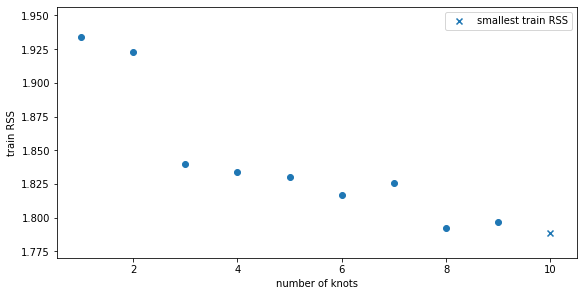

In [9]:
min_rss = np.amin(rss_train_arr)
min_idx = np.where(rss_train_arr == min_rss)[0][0]
rss_train_arr = np.delete(rss_train_arr, min_idx)

knots_arr = np.arange(1, total_knots + 1)
knots_arr = np.delete(knots_arr, min_idx)

fig, ax = plt_func.subplots(1, 1, constrained_layout=True, figsize=(8, 4))
_ = ax.scatter(
    knots_arr, rss_train_arr
)
_ = ax.scatter(min_idx + 1, min_rss, marker='x', label='smallest train RSS',
               c=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
_ = ax.set_xlabel('number of knots')
_ = ax.set_ylabel('train RSS')
_ = ax.legend()

<h3>Exercise 7.9.6</h3>
<blockquote>
    <i>Perform cross-validation or another approach in order to select the best degrees of freedom for a regression spline on this data. Describe your results.</i>
</blockquote>

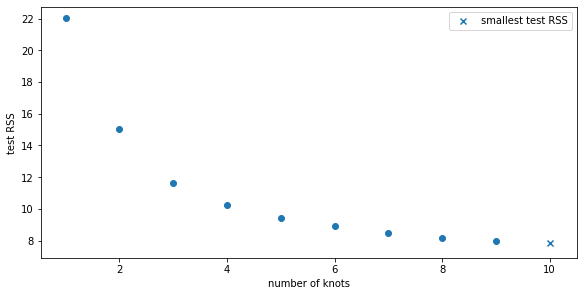

In [10]:
total_knots = 10
rss_test_arr = np.zeros((total_knots, ))
for knots in range(1, total_knots + 1):
    df = knots + 3
    RSS = 0
    for train_index, test_index in loocv.split(df_x):
        df_x_train, df_x_test = df_x[['dis']].iloc[train_index], df_x[['dis']].iloc[test_index]
        df_y_train, df_y_test = df_y.iloc[train_index], df_y.iloc[test_index]

        fitted = sm.OLS(df_y_train, df_x_train).fit()
        Y_pred = fitted.predict(df_x_test.to_numpy())
        
        
        
        df_X_transformed_train = dmatrix(f'bs(df_x_train["dis"], df={df}, include_intercept=True)',
                                         {'df_x_train["dis"]': df_x_train["dis"]}, return_type='dataframe')

        assert df_X_transformed_train.shape[1] == df + 1
        fitted = sm.GLM(df_y_train, df_X_transformed_train).fit()

        sr_Y_pred = fitted.predict(dmatrix_func(f'bs(df_x_test["dis"], df={df}, include_intercept=True)', 
                                           {'df_x_test["dis"]': df_x_test["dis"]}, return_type='dataframe'))
        RSS += (df_y_test.iloc[0, 0] - sr_Y_pred.iloc[0])**2
    
    rss_test_arr[knots-1] = RSS
        
min_rss = np.amin(rss_test_arr)
min_idx = np.where(rss_test_arr == min_rss)[0][0]
rss_test_arr = np.delete(rss_test_arr, min_idx)

knots_arr = np.arange(1, total_knots + 1)
knots_arr = np.delete(knots_arr, min_idx)

fig, ax = plt_func.subplots(1, 1, constrained_layout=True, figsize=(8, 4))
_ = ax.scatter(
    knots_arr, rss_test_arr
)
_ = ax.scatter(min_idx + 1, min_rss, marker='x', label='smallest test RSS',
               c=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
_ = ax.set_xlabel('number of knots')
_ = ax.set_ylabel('test RSS')
_ = ax.legend()